In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.3)
import pandas as pd
import warnings
import sys

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DirectoryName = '/Users/seetha/Box Sync/NoReward/ImagingData/Good_behavior_suite2p/'

In [3]:
animalname = [f for f in os.listdir(DirectoryName) if
                   f not in ['.DS_Store', 'LickData',
                             'PlaceCellResults_All', 'BayesResults_All', 'SaveAnalysed']]

CFC4 29
NR14 7
NR15 3
NR23 19
NR24 3
NR34 1
CFC19 3
CFC17 10
NR32 0
CFC16 10
NR6 4
NR21 10


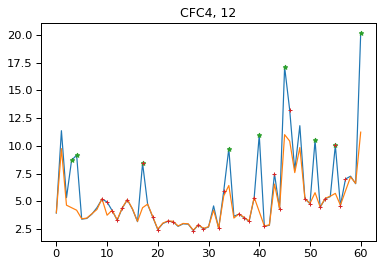

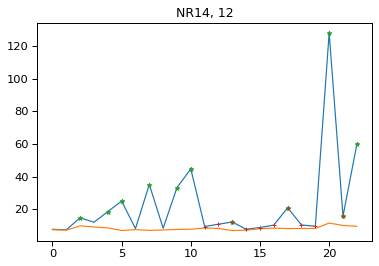

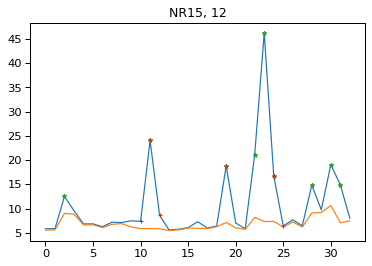

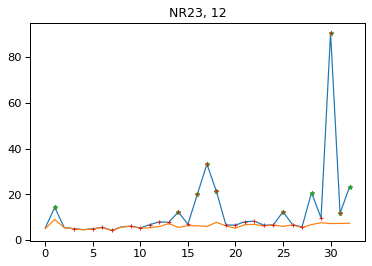

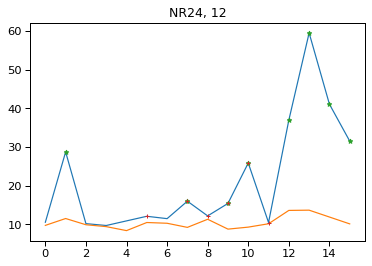

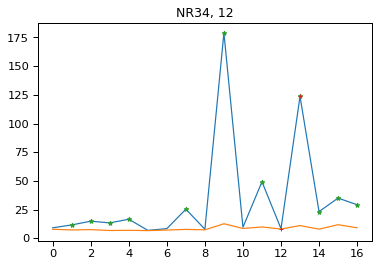

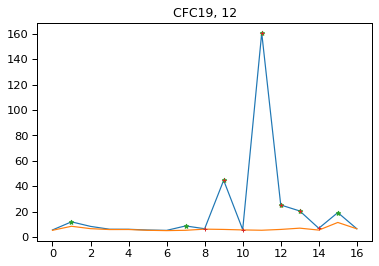

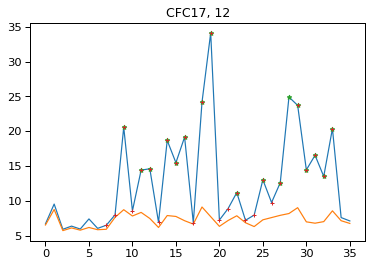

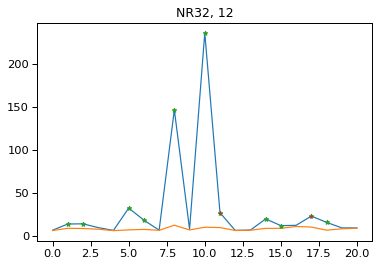

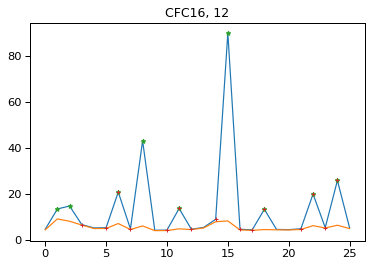

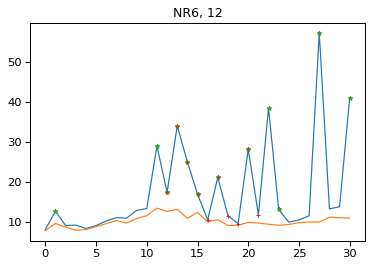

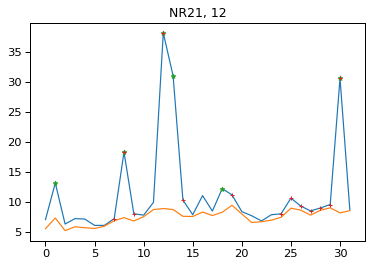

In [4]:
laps_to_use = {k: [] for k in animalname}
for a in animalname:
    # Get attentive laps
    at = np.load(os.path.join(DirectoryName, a,
                              'SaveAnalysed', 'attentionlaps.npz'))
    attentive_laps_wo_licks = at['attentivelaps_withoutlicks']

    # Get laps without freezing
    b = np.load(os.path.join(DirectoryName, a, 'SaveAnalysed',
                             'behavior_data.npz'), allow_pickle=True)
    actual_laptime = np.asarray(b['actuallaps_laptime'].item()['Task2'])
    goodlap_laptime = np.asarray(b['goodlaps_laptime'].item()['Task2'])
    slowlaps = np.where((actual_laptime-goodlap_laptime) > 3)[0]

    # Good laps
    laps_to_use[a] = attentive_laps_wo_licks[~np.in1d(
        attentive_laps_wo_licks, slowlaps)]

    fs = plt.figure()
    plt.plot(actual_laptime)
#     plt.plot(goodlap_laptime)
    plt.plot(slowlaps, actual_laptime[slowlaps],  '*')
    plt.plot(attentive_laps_wo_licks, actual_laptime[attentive_laps_wo_licks], '+')
    plt.title('%s, %d' %(a, len(laps_to_use)))

    print(a, len(laps_to_use[a]))
#     scipy.io.savemat(os.path.join(
#         '/Users/seetha/Box Sync/NoReward/ImagingData', 'laps_to_use_per_animal.mat'), laps_to_use)

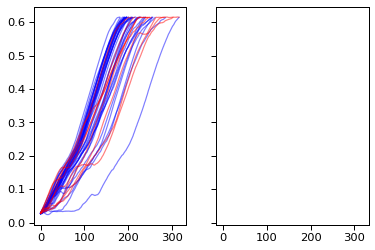

In [12]:
fs, ax = plt.subplots(1, 2, sharex='all', sharey='all')
for a in [ 'CFC17']:#, 'NR23', 'NR21', 'CFC17', 'CFC16']:
    b = np.load(os.path.join(DirectoryName, a, 'SaveAnalysed',
                             'behavior_data.npz'), allow_pickle=True)
    for n, t in enumerate(['Task1', 'Task2']):
        running_data = b['actualrunninglaps'].item()[t]
        for i in np.arange(0, len(running_data)):
            if t == 'Task2' and i in laps_to_use[a]:
                if a in ['CFC16', 'CFC17'] and i in [17, 24]:
                    continue
                else:
                    ax[0].plot(running_data[i], 'red', alpha=0.5)
            elif t == 'Task1':
                ax[0].plot(running_data[i], 'blue', alpha=0.5)